In [ ]:
import pandas as pd 
import numpy as np
from preprocess import generate_embeddings, preprocess_metadata
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

In [ ]:
queries = pd.read_csv("../data/queries.csv")

test_queries = pd.read_csv("../data/test_queries.csv")
test_queries=list(test_queries['query'])

items = pd.read_csv("../data/5k_items_processed.csv")

In [ ]:
import json
items['jointText'] = items.apply(lambda row: preprocess_metadata(row['itemMetadata'], row['itemProfile'],type='Basic'), axis=1)

In [4]:
items['jointTextNatural'] = items.apply(lambda row: preprocess_metadata(row['itemMetadata'], row['itemProfile'],type='Natural'), axis=1)

In [ ]:
items['organic'] = items.apply(lambda row: json.loads(row['itemMetadata'])['organic'], axis=1)
items['lacFree'] = items.apply(lambda row: json.loads(row['itemMetadata'])['lacFree'], axis=1)
items['vegan'] = items.apply(lambda row: json.loads(row['itemMetadata'])['vegan'], axis=1)
items['avgBasketPrice'] = items.apply(lambda row: json.loads(row['itemProfile'])["metrics"]['avgBasketPrice'], axis=1)
items['total_orders'] = items.apply(lambda row: json.loads(row['itemProfile'])["metrics"]['total_orders'], axis=1)
items['category_name'] = items.apply(lambda row: json.loads(row['itemMetadata'])['category_name'], axis=1)

In [97]:
reorderRate=[]
for i, row in items.iterrows():
    try:
        reorderRate.append(json.loads(row['itemProfile'])["metrics"]["reorderRate"])
    except:
        reorderRate.append(0.0)
items['reorderRate']=reorderRate

In [5]:
items.head(15)

,_id,itemId,itemMetadata,itemProfile,merchantId,jointText,organic,lacFree,vegan,avgBasketPrice,total_orders,reorderRate,embeddings_jointText,jointTextNatural
0,6813b2b5b7476b2ec454b7ff,442731c2-144b-4c5c-b81e-e0cf9dfa9630,"{""category_name"":""Alimentos Básicos"",""descript...","{""metrics"":{""avgBasketPrice"":159.89,""coPurchas...",d6cf7b73-c9bb-4c8a-abd6-c1a832bdd461,Macarrão Pena com Ovos Adria 500g Pacote 500g ...,False,False,False,159.89,16,0.00,"[-0.008768842555582523, 0.0031782048754394054,...",Macarrão Pena com Ovos Adria 500g pertencente ...
1,6813b2b5b7476b2ec454b800,4a6d4a8f-c1bf-4457-a448-4a3b5e1eb20c,"{""category_name"":""Doces e Sobremesas"",""descrip...","{""metrics"":{""avgBasketPrice"":182.44,""coPurchas...",d6cf7b73-c9bb-4c8a-abd6-c1a832bdd461,Goplana Squares Pistache 200g Embalagem 200g D...,False,False,False,182.44,1,0.00,"[-0.02953251823782921, -0.03579430282115936, -...",Goplana Squares Pistache 200g pertencente à ca...
2,6813b2b5b7476b2ec454b801,5380e263-c202-45cf-8eae-81e54573f122,"{""category_name"":""Higiene e Cuidados Pessoais""...","{""metrics"":{""avgBasketPrice"":190.63,""coPurchas...",d6cf7b73-c9bb-4c8a-abd6-c1a832bdd461,Creme para Pentear Boom Definição Intensa Seda...,False,False,False,190.63,3,0.00,"[0.05936675891280174, 0.020629625767469406, -0...",Creme para Pentear Boom Definição Intensa Seda...
3,6813b2b5b7476b2ec454b802,595ce305-ddf5-49fc-9a8c-b50a9ccf6267,"{""category_name"":""Higiene e Cuidados Pessoais""...","{""metrics"":{""avgBasketPrice"":113.56,""coPurchas...",d6cf7b73-c9bb-4c8a-abd6-c1a832bdd461,Desodorante Invisible For Black & White Aeroso...,False,False,False,113.56,3,0.00,"[0.05391239747405052, -0.03024141862988472, -0...",Desodorante Invisible For Black & White Aeroso...
4,6813b2b5b7476b2ec454b803,5e2db3a9-1a2c-4462-8aa1-1ed045122e12,"{""category_name"":""Pet Shop"",""description"":""• R...","{""metrics"":{""avgBasketPrice"":223.58,""coPurchas...",d6cf7b73-c9bb-4c8a-abd6-c1a832bdd461,Ração Úmida para Cães Filhotes Frango Ao Molho...,False,False,False,223.58,1,0.00,"[0.06496849656105042, 0.01100705936551094, -0....",Ração Úmida para Cães Filhotes Frango Ao Molho...
5,6813b2b5b7476b2ec454b804,64646213-fd27-4df7-92bd-70b34a1bf033,"{""category_name"":""Molhos, Condimentos e Conser...","{""metrics"":{""avgBasketPrice"":179.02,""coPurchas...",d6cf7b73-c9bb-4c8a-abd6-c1a832bdd461,Páprica Doce Defumada em Pó Sol Dos Andes 90g ...,False,False,False,179.02,3,0.00,"[0.0030747842974960804, -0.01770949922502041, ...",Páprica Doce Defumada em Pó Sol Dos Andes 90g ...
6,6813b2b5b7476b2ec454b805,69a6ff46-09a0-4875-a9c0-517af24b6ef0,"{""category_name"":""Frios e Laticínios"",""descrip...","{""metrics"":{""avgBasketPrice"":113.9,""coPurchase...",d6cf7b73-c9bb-4c8a-abd6-c1a832bdd461,Queijo Minas Padrão Fatiado Président 150g Fr...,False,False,False,113.90,2,0.00,"[0.016593080013990402, -0.01595371402800083, -...",Queijo Minas Padrão Fatiado Président 150g per...
7,6813b2b5b7476b2ec454b806,81224224-5628-4c2a-9592-3084995961fd,"{""category_name"":""Alimentos Básicos"",""descript...","{""metrics"":{""avgBasketPrice"":109.01,""coPurchas...",d6cf7b73-c9bb-4c8a-abd6-c1a832bdd461,Arroz Solito 1kg Integral Pacote 1kg Alimentos...,False,False,False,109.01,1,0.00,"[-0.016638509929180145, -0.009825281798839569,...",Arroz Solito 1kg Integral pertencente à catego...
8,6813b2b5b7476b2ec454b807,8d57346c-02c5-4f38-8320-ce26c64fc42c,"{""category_name"":""Alimentos Básicos"",""descript...","{""metrics"":{""avgBasketPrice"":211.81,""coPurchas...",d6cf7b73-c9bb-4c8a-abd6-c1a832bdd461,Farinha de Linhaça Marrom Integral Vitalin Emb...,False,False,False,211.81,1,0.00,"[-0.07406390458345413, 0.027040420100092888, 0...",Farinha de Linhaça Marrom Integral Vitalin Emb...
9,6813b2b5b7476b2ec454b808,95e40e8e-d157-41d3-86d8-3b105dda5c9a,"{""category_name"":""Congelados e Resfriados"",""de...","{""metrics"":{""avgBasketPrice"":362.22,""coPurchas...",d6cf7b73-c9bb-4c8a-abd6-c1a832bdd461,Hamburger de Costela Wessel 360g Embal

In [57]:
items['organic'].value_counts()

organic
False    4972
True       28
Name: count, dtype: int64

In [58]:
items['lacFree'].value_counts()

lacFree
False    4961
True       39
Name: count, dtype: int64

In [59]:
items['vegan'].value_counts()

vegan
False    4977
True       23
Name: count, dtype: int64

In [102]:
items.to_csv("../data/5k_items_processed.csv", index=False)

In [ ]:
embeddings_items =generate_embeddings(items['jointText'])

In [6]:
embeddings_items_natural =generate_embeddings(items['jointTextNatural'])

In [144]:
items['embeddings_jointText']=embeddings_items
items.to_csv("../data/5k_items_processed.csv", index=False)

In [13]:
query_embedding=generate_embeddings(queries['search_term_pt'])

In [11]:
len(embeddings_items[0])

1536

In [ ]:
def semantic_search(query_embedding, item_embeddings, top_k=10):
    # Compute cosine similarity
    similarities = cosine_similarity([query_embedding], item_embeddings)[0]
    
    # Get top-k most similar items
    top_k_indices = np.argsort(similarities)[-top_k:][::-1]
    return top_k_indices, similarities[top_k_indices]

In [18]:
top_k_indices, similarities=semantic_search(query_embedding[0], embeddings_items, top_k=5)

In [32]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import json
import matplotlib.pyplot as plt
from PIL import Image
import requests
from io import BytesIO


def display_search_results(query, query_embedding, item_embeddings, items_df, top_k=5):
    """
    Display search results including item details and images.
    
    Args:
        query: The original search query text
        query_embedding: The embedding vector of the query
        item_embeddings: A 2D array of item embedding vectors
        items_df: DataFrame containing item data
        top_k: Number of top results to display
    """
    # Perform semantic search
    top_indices, top_scores = semantic_search(query_embedding, item_embeddings, top_k=top_k)
    
    print(f"Search Query: '{query}'")
    print(f"Top {top_k} Results:")
    print("-" * 80)
    
    # Create a figure for displaying images
    fig, axes = plt.subplots( top_k,1, figsize=(10, 30))
    if top_k == 1:
        axes = [axes]  # Make axes iterable when top_k=1
    
    for i, (idx, score) in enumerate(zip(top_indices, top_scores)):
        row = items_df.iloc[idx]
        
        # Parse itemMetadata
        item_meta = json.loads(row['itemMetadata'])
        
        # Extract item details
        item_name = item_meta.get('name', 'Unknown Item')
        item_description = item_meta.get('description', 'No description')
        item_price = item_meta.get('price', 'Price not available')
        item_category = item_meta.get('category_name', 'No category')
        
        # Print item details
        print(f"Rank {i+1}: {item_name}")
        print(f"  Description: {item_description}")
        print(f"  Price: R${item_price:.2f}" if isinstance(item_price, (int, float)) else f"  Price: {item_price}")
        print(f"  Category: {item_category}")
        print(f"  Similarity Score: {score:.4f}")
        
        # Get image URL
        images = item_meta.get('images', [])
        if images:
            image_str = images[0]
            image_url = f"https://static.ifood-static.com.br/image/upload/t_low/pratos/{image_str}"
            print(f"  Image URL: {image_url}")
            
            # Try to display the image
            try:
                response = requests.get(image_url)
                img = Image.open(BytesIO(response.content))
                axes[i].imshow(img)
                axes[i].set_title(f"{i+1}. {item_name[:20]}..." if len(item_name) > 20 else f"{i+1}. {item_name}")
                axes[i].axis('off')
            except Exception as e:
                print(f"  Error loading image: {e}")
                axes[i].text(0.5, 0.5, "Image not available", ha='center', va='center')
                axes[i].axis('off')
        else:
            print("  No image available")
            axes[i].set_title(f"{i+1}. {item_name[:20]}..." if len(item_name) > 20 else f"{i+1}. {item_name}")
            axes[i].text(0.5, 0.5, "No image", ha='center', va='center')
            axes[i].axis('off')
        
        print("-" * 80)
    
    plt.tight_layout()
    plt.show()
    
    return top_indices, top_scores


Search Query: 'Macarrão tipo pena com ovos para pratos rápidos'
Top 10 Results:
--------------------------------------------------------------------------------
Rank 1: Macarrão Pena com Ovos Adria 500g
  Description: Pacote 500g
  Price: R$3.56
  Category: Alimentos Básicos
  Similarity Score: 0.6970
  Image URL: https://static.ifood-static.com.br/image/upload/t_low/pratos/820af392-002c-47b1-bfae-d7ef31743c7f/202210182253_3h93mu9eg9y.jpg
--------------------------------------------------------------------------------
Rank 2: Macarrão com Ovos Parafuso Renata 500g
  Description: Embalagem 500g
  Price: R$4.11
  Category: Alimentos Básicos
  Similarity Score: 0.6754
  Image URL: https://static.ifood-static.com.br/image/upload/t_low/pratos/820af392-002c-47b1-bfae-d7ef31743c7f/202301051600_bmpd7pgth3o.jpg
--------------------------------------------------------------------------------
Rank 3: Macarrão com Ovos Ninho 2 Renata Pacote 500g
  Description: Pacote 500g
  Price: R$7.29
  Categor

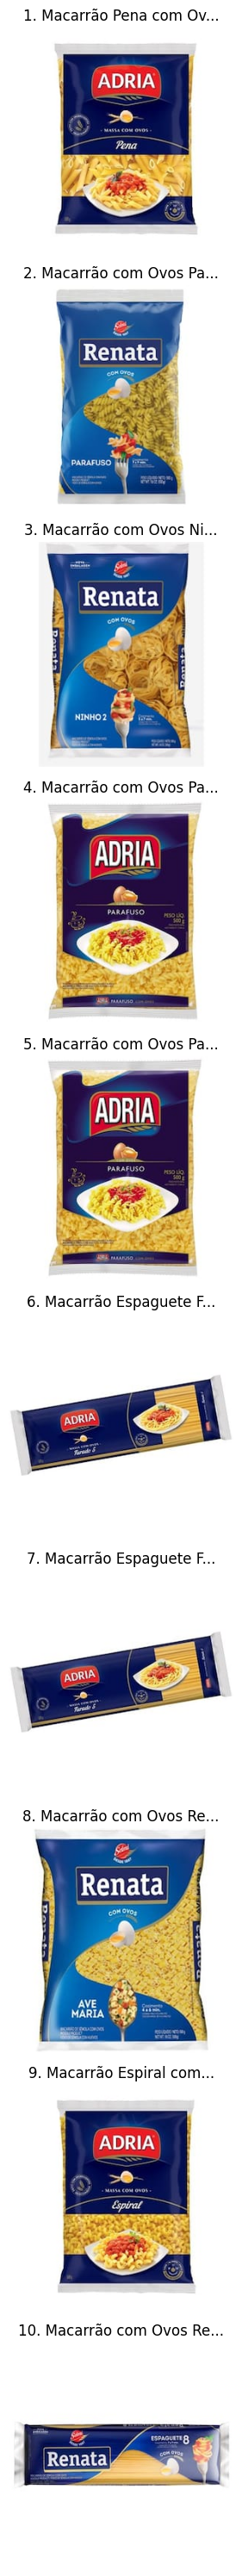

In [122]:
query = "Macarrão tipo pena com ovos para pratos rápidos"
query_embedding = generate_embeddings([query])[0]  # Your embedding function
item_embeddings = np.array(embeddings_items)  # Assuming embeddings are stored in the DataFrame
items_df = items

# Display search results with images
top_indices, top_scores = display_search_results(query, query_embedding, item_embeddings, items_df, top_k=10)


In [14]:

results=[]
item_embeddings = np.array(embeddings_items_natural) 
for query in test_queries:
    query_embedding = generate_embeddings([query])[0] 
    top_indices, top_scores = semantic_search(query_embedding, item_embeddings, top_k=10)
    results.append(top_indices.tolist())


In [139]:

metrics = evaluate_search_system(test_queries, results)
print("Evaluation Results:")
for metric, value in metrics.items():
    print(f"{metric}: {value:.3f}")

Evaluation Results:
mrr: 0.566
average_rank: 4.025
hit_rate@1: 0.445
precision@1: 0.445
recall@1: 0.445
hit_rate@3: 0.640
precision@3: 0.213
recall@3: 0.640
hit_rate@5: 0.720
precision@5: 0.144
recall@5: 0.720
hit_rate@10: 0.795
precision@10: 0.079
recall@10: 0.795


In [19]:
metrics = evaluate_search_system(test_queries, results)
print("Evaluation Results:")
for metric, value in metrics.items():
    print(f"{metric}: {value:.3f}")

Evaluation Results:
mrr: 0.560
average_rank: 3.975
hit_rate@1: 0.435
precision@1: 0.435
recall@1: 0.435
hit_rate@3: 0.675
precision@3: 0.225
recall@3: 0.675
hit_rate@5: 0.725
precision@5: 0.145
recall@5: 0.725
hit_rate@10: 0.810
precision@10: 0.081
recall@10: 0.810
